In [1]:
from gan import *
from dataset import *
import numpy as np
from matplotlib import pyplot as plt
conf = {
    'gen_conf':{
        'name':'dcgan_g',
        'z_dim':100,
        'hidden_size':128,
        'channel':1
    },
    
    'dis_conf':{
        'name':'dcgan_d',
        'hidden_size':64,
        'channel':1
    },
    'sampler':'gaussian'
}

In [2]:
dataset = BiasedMNIST(size=32, label_count=[0,100,0,0,0,0,0,0,2000,0])

/home/chang/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Biased MNIST generated: [    0.   100.     0.     0.     0.     0.     0.     0.  2000.     0.]


(2100, 1, 32, 32)


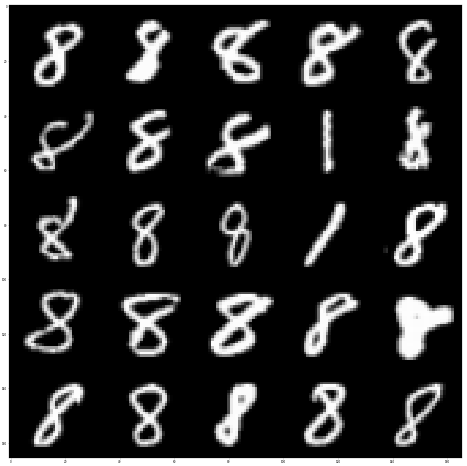

In [3]:
import importlib
import vis
vis = importlib.reload(vis)
_ = vis.show_image_dataset(dataset, n_row=5, n_col=5)

In [4]:
dev = torch.device('cuda')
gan = GAN(gen_conf=conf['gen_conf'], 
          dis_conf=conf['dis_conf'], 
          sampler_type=conf['sampler'], 
          dataset=dataset, 
          batch_size=128, device=dev)

In [33]:
gan.train_mode()
gan.train(iters=10000)

100%|██████████| 10000/10000 [20:14<00:00,  8.01it/s]


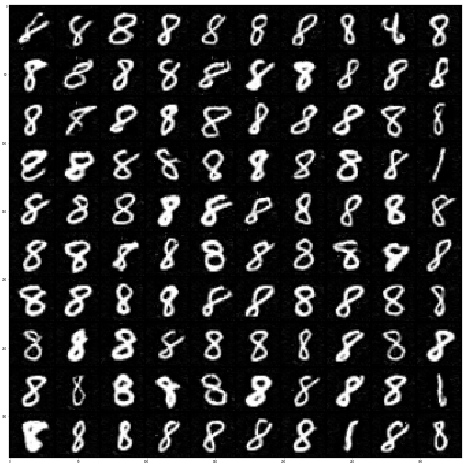

In [35]:
_ = vis.show_image_gan(gan, 10, 10)

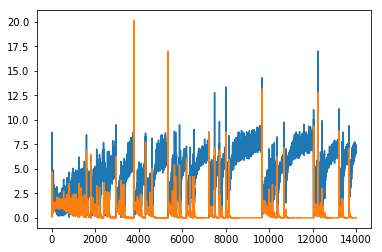

In [36]:
plt.figure()
plt.plot(gan.g_losses)
plt.plot(gan.d_losses)
plt.show()

torch.Size([20, 1, 32, 32])
[8 8 8 1 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
8 0.995401
8 0.999344
8 0.999671
1 0.987396
8 0.999613
8 0.999007
8 0.997862
8 0.999053
8 0.99717
8 0.999244
8 0.998619
8 0.999413
8 0.999048
8 0.995917
8 0.995601
8 0.995656
8 0.998962
8 0.999141
8 0.998608
8 0.996267


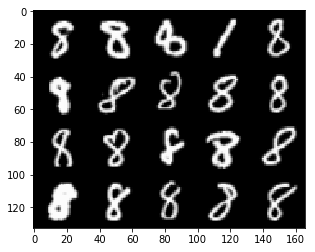

In [37]:
real_samples, lbs = dataset.sample_batch(20)
print(real_samples.shape)
d_real_data = real_samples.to(dtype=torch.float32, device=gan.device)
confidence = gan.dis(d_real_data)
confidence = confidence.cpu().detach().numpy().flatten()
print(lbs)
for i in range(len(lbs)):
    print(lbs[i],confidence[i])

vis.showallimg(real_samples, 5)

[  8.23888741e-03   1.27824047e-03   3.70334322e-03   3.76295502e-04
   1.00605120e-03   1.25333492e-03   3.10050440e-04   1.58835010e-05
   5.88108262e-04   5.08136407e-04   3.09069688e-03   4.82846954e-04
   2.74755759e-04   2.85055838e-04   8.85181304e-04   1.42311503e-03
   2.24456005e-03   7.71868275e-04   2.97828665e-04   3.12017021e-03]


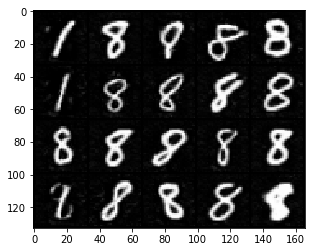

In [38]:
fake_img, fake_d = gan.eval_fake(20)
fake_d = fake_d.cpu().detach().numpy().flatten()
print(fake_d)
vis.showallimg(fake_img, 5)

In [39]:
class_conf = {
    'name':'dcgan_d',
    'hidden_size':64,
    'channel':1
}
classifier, losses = gan.train_classifier(conf['dis_conf'], 50)


100%|██████████| 50/50 [00:02<00:00, 17.14it/s]


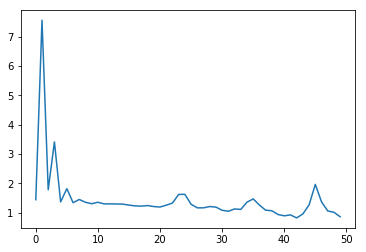

In [40]:
plt.plot(losses)
plt.show()

torch.Size([50, 1, 32, 32])
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 1 8 1 1 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8]
8 0.820276
8 0.624176
8 0.721739
8 0.759962
8 0.792892
8 0.640913
8 0.677956
8 0.811168
8 0.751051
8 0.773689
8 0.763413
8 0.547991
8 0.704568
8 0.596742
8 0.761424
8 0.823323
8 0.739748
8 0.626582
8 0.831524
8 0.883277
8 0.720209
8 0.516665
8 0.83795
8 0.751241
8 0.461644
8 0.645155
8 0.896518
1 0.771302
8 0.507752
1 0.707863
1 0.776604
8 0.872153
8 0.694246
8 0.676459
8 0.562576
8 0.558606
8 0.95066
8 0.879859
8 0.65155
8 0.933189
8 0.688528
8 0.609957
8 0.854888
8 0.674651
8 0.299104
8 0.78742
8 0.795472
8 0.722104
8 0.85774
8 0.814669


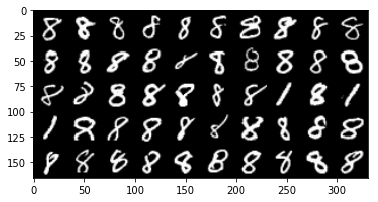

In [41]:
real_samples, lbs = dataset.sample_batch(50)
print(real_samples.shape)
d_real_data = real_samples.to(dtype=torch.float32, device=gan.device)
confidence = classifier(d_real_data)
confidence = confidence.cpu().detach().numpy().flatten()
print(lbs)
for i in range(len(lbs)):
    print(lbs[i],confidence[i])

vis.showallimg(real_samples, 10)

[ 0.2447505   0.25691742  0.11962988  0.29882845  0.3333692   0.28896156
  0.25041333  0.40917459  0.21564141  0.21018487  0.45080528  0.40601194
  0.25996774  0.19510551  0.34558022  0.35406291  0.429539    0.43338487
  0.32117012  0.46152675]


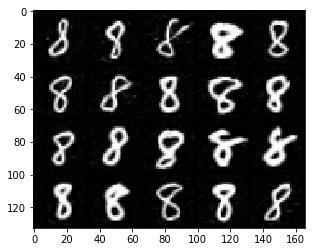

In [42]:
fake_samples = gan.gen_samples(20)
# latent_samples = gan.sampler.sampling(20)
# d_gen_input = latent_samples.to(dtype=torch.float32, device=gan.device)
# fake_samples = gan.gen(d_gen_input)
d_fake_data = fake_samples.to(dtype=torch.float32, device=gan.device)
confidence = classifier(d_fake_data)
confidence = confidence.cpu().detach().numpy().flatten()
print(confidence)
vis.showallimg(fake_samples, 5)